# A Breakdown of Comp Attendance and Success in Week Three 2017

In [1]:
import seaborn as sns
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore') 
import pickle
import numpy as np
import pandas as pd
import tbapy
import DatabaseGen as DBG

In [2]:
data = pd.read_pickle("week3" + ".p")

## Number of teams

In [3]:
total_teams = len(data)
total_teams

431

## Number of teams who were picked

In [4]:
total_teams_picked = len(data[data['final'] == True])
total_teams_picked

192

## Number of teams who had already been to a comp

In [5]:
prev_comp = len(data[data['num_comps'] >= 1])
prev_comp

198

## Number of teams who had already been to a comp and were picked

In [6]:
prev_comp_and_pick = len(data[(data['final'] == True) & (data['num_comps'] >= 1)])
prev_comp_and_pick

140

## Number of teams who had not already been to a comp

In [7]:
not_prev_comp = len(data[data['num_comps'] == 0])
not_prev_comp

233

## Number of teams who had not already been to a comp and were picked

In [8]:
not_prev_comp_and_pick = len(data[(data['final'] == True) & (data['num_comps'] == 0)])
not_prev_comp_and_pick

52

# 45% of teams got picked 

In [9]:
total_teams_picked/total_teams*100

44.5475638051044

# 22% of teams who had not already been to a comp got picked 

In [10]:
not_prev_comp_and_pick/not_prev_comp*100

22.317596566523605

# 71% of teams who had already been to a comp got picked 

In [11]:
prev_comp_and_pick/prev_comp*100

70.70707070707071

# 73% of teams who got picked had already been to a comp

In [12]:
prev_comp_and_pick/total_teams_picked*100

72.91666666666666

# The average age of teams who got picked was 8.7 years

In [13]:
sum(data[data['final'] == True]['rookie_year'])/len(data[data['final'] == True])

8.7083333333333339

In [17]:
data['carried'] = data['team_avg_opr'] / data['oppo_avg_opr']

# Our teams stats

In [28]:
data['final'][data['final']==True] = "Picked"
data['final'][data['final']==False] = "Not_Picked"
data.loc['frc4924']

rookie_year                3
team_number             4924
ccwms               0.778301
dprs                  67.577
oprs                 68.3553
final             Not_Picked
num_comps                  0
last_num_comps             1
last_opr_comps       18.8979
opr_comps                  0
gears                2.49848
rope                 1.33226
mean_prev_opr        39.4877
team_avg_opr         72.3724
oppo_avg_opr          64.476
carried              1.12247
Name: frc4924, dtype: object

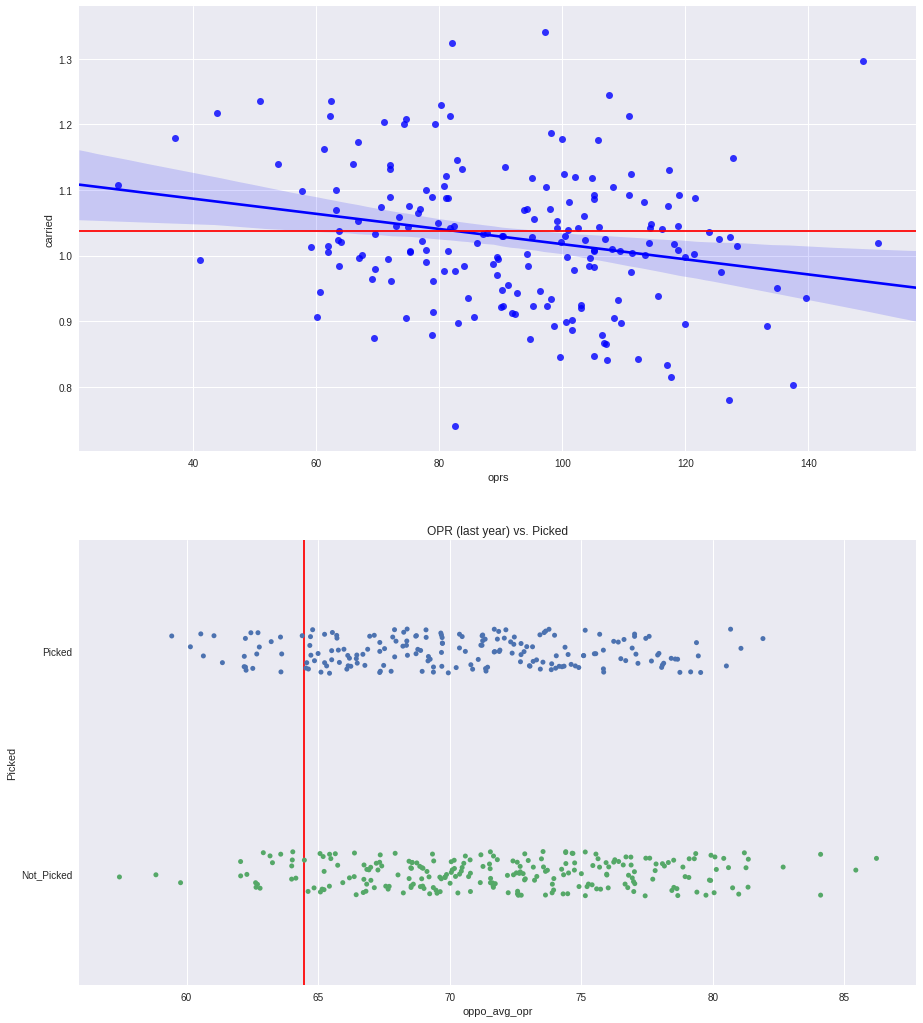

In [25]:
f, axarr = plt.subplots(2, 1, figsize=(15, 18))

p1 = sns.regplot(y='carried', x='oprs', color='blue', data=data[data['final']=='Picked'], ax=axarr[0])

x = axarr[0].get_xlim()
p1.plot(x, len(x) * [1.03781], color='red')


p2 = sns.stripplot(y='final', x='oppo_avg_opr', orient="h", jitter=True, data=data, ax=axarr[1])

axarr[1].set_title('OPR (last year) vs. Picked')
x2 = axarr[1].get_ylim()
p2.plot(len(x2) * [64.476], x2, color='red')

p2.set(ylabel='Picked')
plt.show()

# Graphs of OPR vs getting picked
[Explanation of OPR](https://www.chiefdelphi.com/forums/showthread.php?t=101390)
The red line is us.

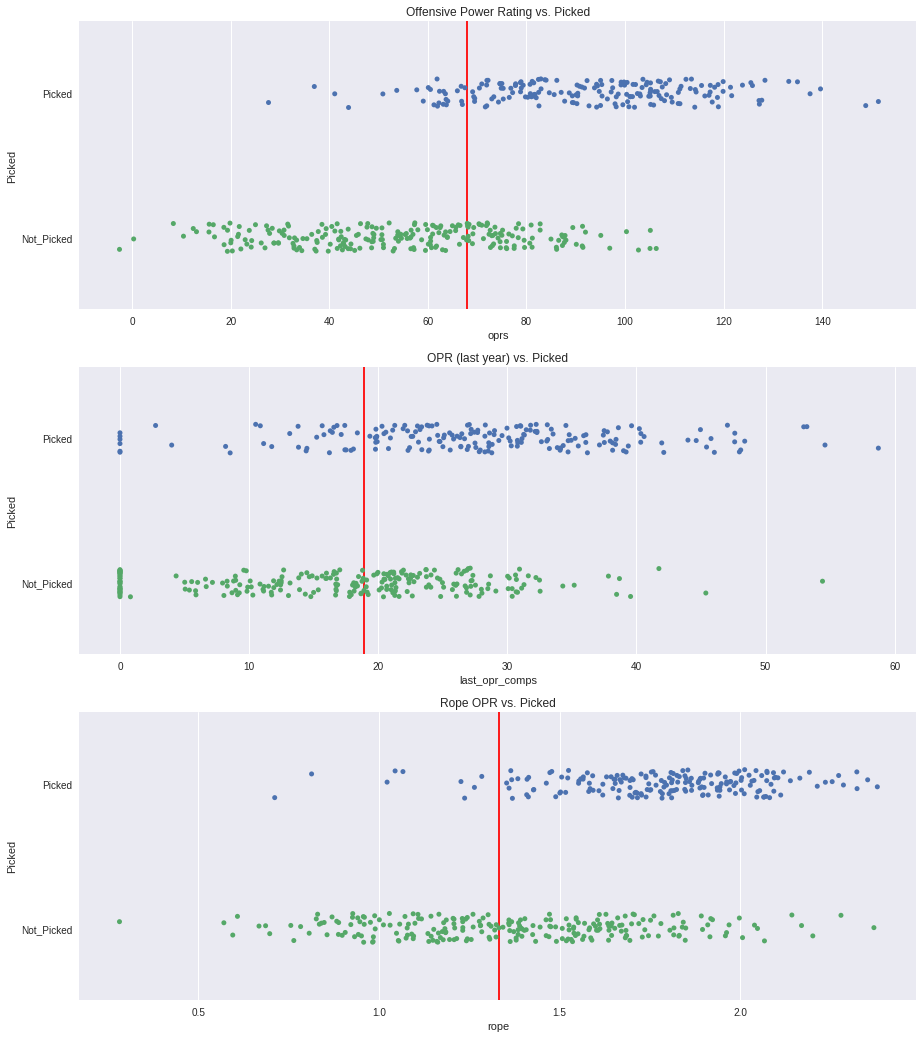

In [15]:
f, axarr = plt.subplots(3, 1, figsize=(15, 18))

p1 = sns.stripplot(y='final', x='oprs', orient="h", jitter=True, data=data, ax=axarr[0])

axarr[0].set_title('Offensive Power Rating vs. Picked')
x = axarr[0].get_ylim()
p1.plot(len(x) * [68], x, color='red')
p1.set(ylabel='Picked')


p2 = sns.stripplot(y='final', x='last_opr_comps', orient="h", jitter=True, data=data, ax=axarr[1])

axarr[1].set_title('OPR (last year) vs. Picked')
x2 = axarr[1].get_ylim()
p2.plot(len(x2) * [18.8979], x2, color='red')
p2.set(ylabel='Picked')


p3 = sns.stripplot(y='final', x='rope', orient="h", jitter=True, data=data, ax=axarr[2])

axarr[2].set_title('Rope OPR vs. Picked')
x3 = axarr[2].get_ylim()
p3.plot(len(x3) * [1.33226], x3, color='red')
p3.set(ylabel='Picked')


plt.show()

Note: The rope OPR metric is of my own design, and because I have no ground truth to test it against, it is possible it simple correlates to how hard you were carried (unlikely). 

# Number of comps vs Age in relation to OPR

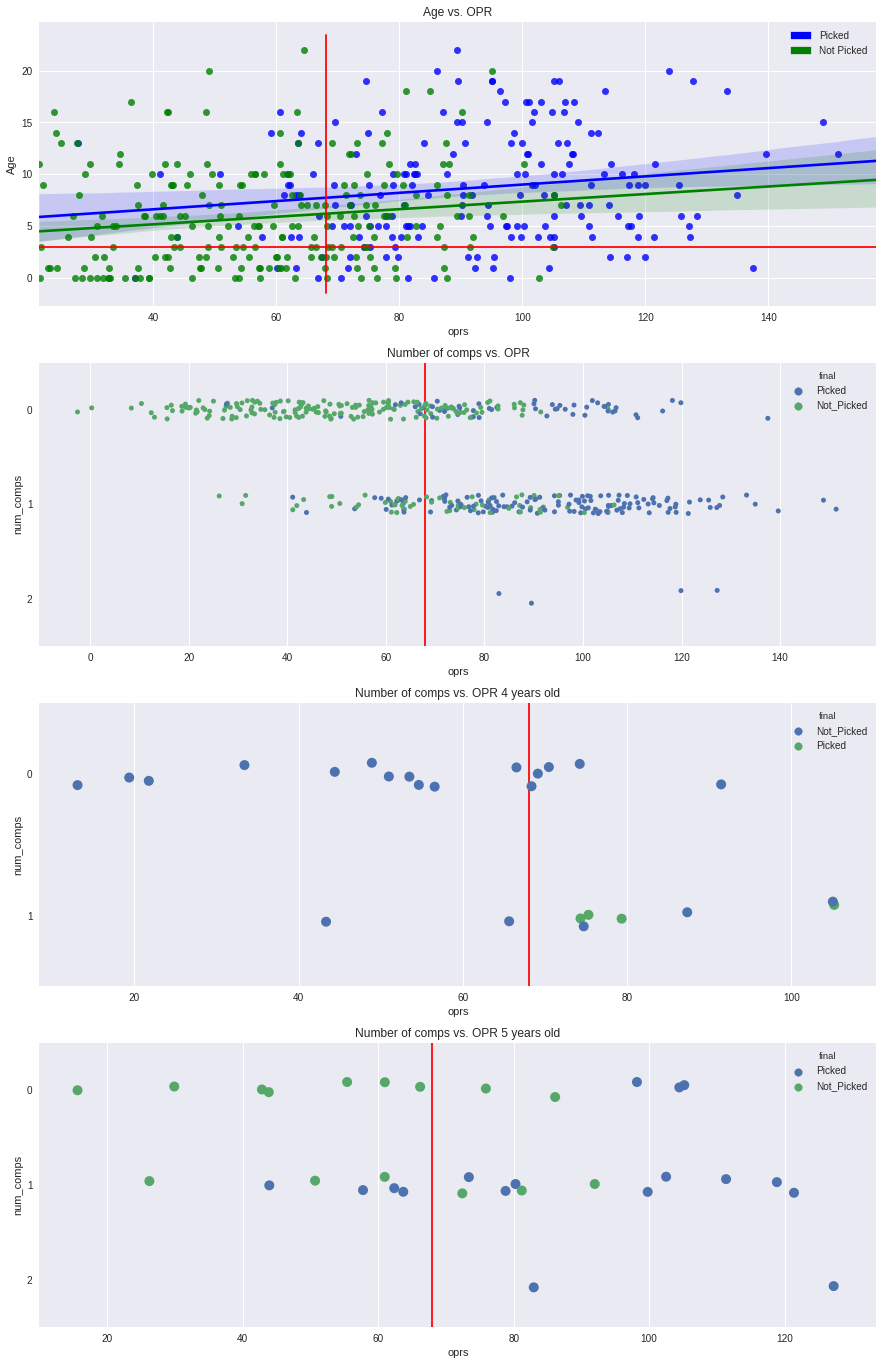

In [16]:
f, axarr = plt.subplots(4, 1, figsize=(15, 24))

p1 = sns.regplot(y='rookie_year', x='oprs', color='blue', data=data[data['final']=='Picked'], ax=axarr[0])
p1 = sns.regplot(y='rookie_year', x='oprs', color='green', data=data[data['final']!='Picked'], ax=axarr[0])

axarr[0].set_title('Age vs. OPR')
x1 = axarr[0].get_ylim()
p1.plot(len(x1) * [68], x1, color='red')
x1 = axarr[0].get_xlim()
p1.plot(x1, len(x1) * [3], color='red')
p1.set(ylabel='Age')

blue_patch = mpatches.Patch(color='blue', label='Picked')
green_patch = mpatches.Patch(color='green', label='Not Picked')
p1.legend(handles=[blue_patch, green_patch])


p2 = sns.stripplot(y='num_comps', x='oprs', orient="h", hue='final', jitter=True, data=data, ax=axarr[1])

axarr[1].set_title('Number of comps vs. OPR')
x2 = axarr[1].get_ylim()
p2.plot(len(x2) * [68], x2, color='red')


p3 = sns.stripplot(y='num_comps', x='oprs', orient="h", hue='final', size=10, jitter=True, data=data[data['rookie_year']==3], ax=axarr[2])

axarr[2].set_title('Number of comps vs. OPR 4 years old')
x3 = axarr[1].get_ylim()
p3.plot(len(x3) * [68], x3, color='red')


p4 = sns.stripplot(y='num_comps', x='oprs', orient="h", hue='final', size=10, jitter=True, data=data[data['rookie_year']==4], ax=axarr[3])

axarr[3].set_title('Number of comps vs. OPR 5 years old')
x4 = axarr[3].get_ylim()
p4.plot(len(x4) * [68], x4, color='red')



plt.show()

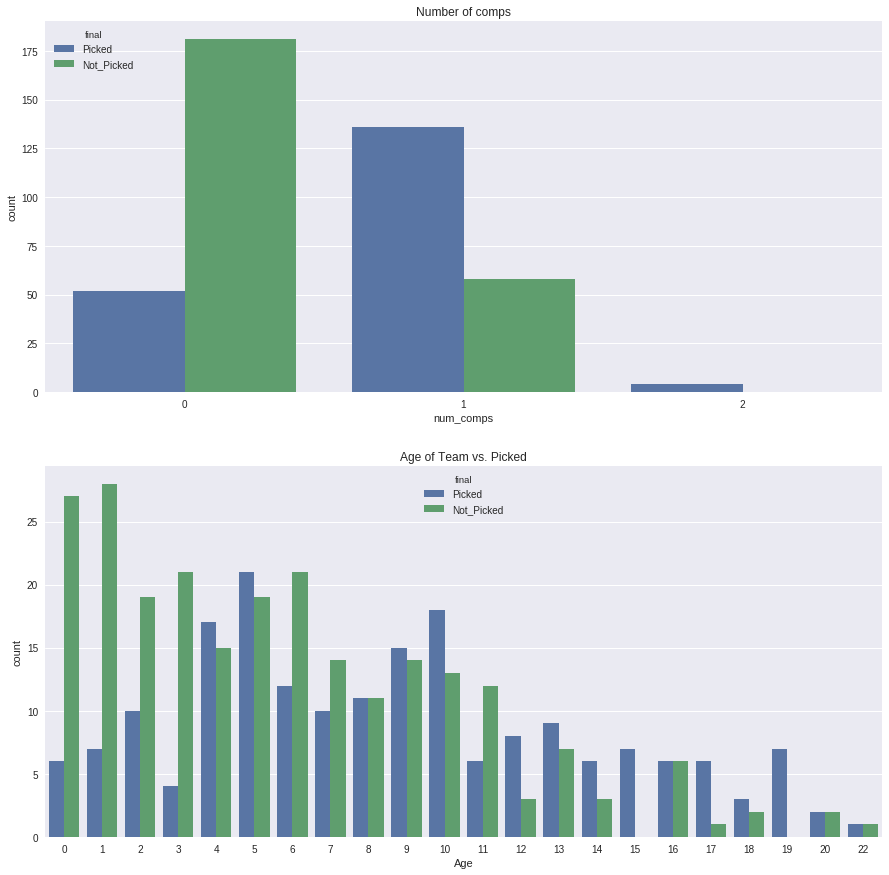

In [17]:
f, axarr = plt.subplots(2, 1, figsize=(15, 15))
sns.countplot(x='num_comps', hue='final', data=data, ax=axarr[0])
rookie = sns.countplot(x='rookie_year', data=data, hue='final', ax=axarr[1])

axarr[0].set_title('Number of comps')
axarr[1].set_title('Age of Team vs. Picked')
rookie.set(xlabel='Age')

plt.show()

Note: Because zero-index, technically last year was year 3 for us and this upcoming year will be year 4 

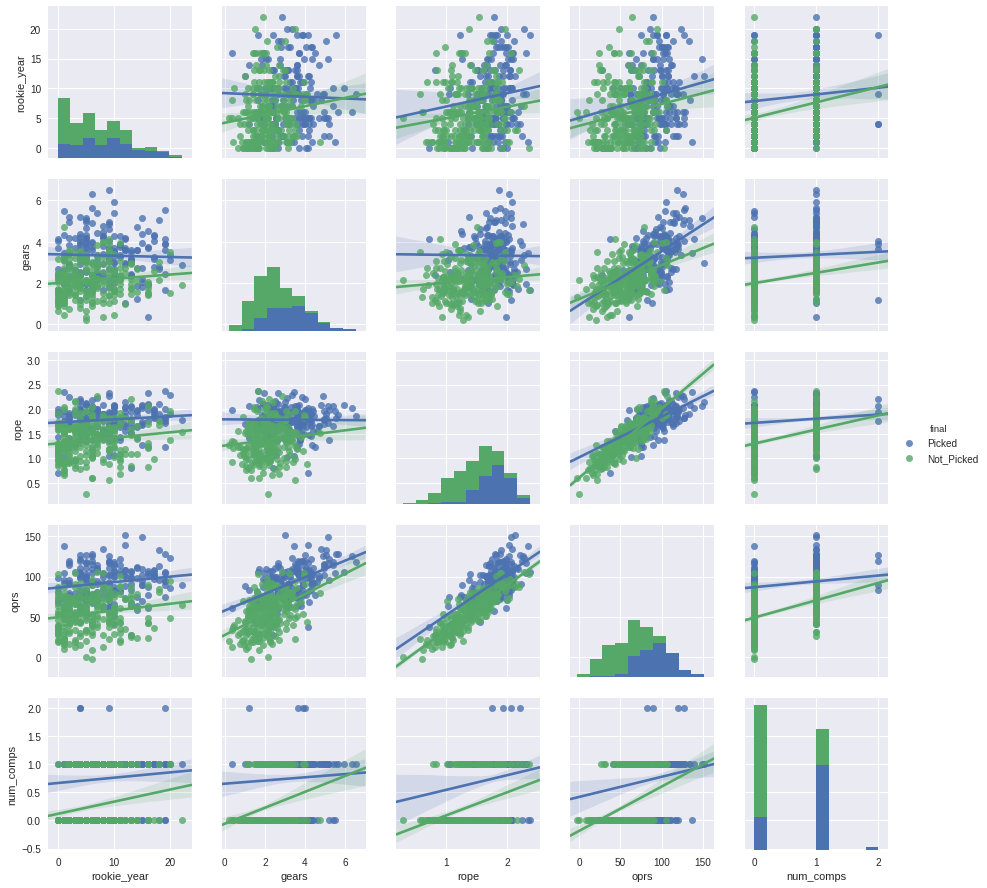

In [18]:
sns.pairplot(data, vars=['rookie_year', 'gears', 'rope', 'oprs', 'num_comps'], hue='final', kind="reg")
plt.show()